Let’s take a dataset based on agricultural metrics over one growing season in a fictional region. We’ll explore aspects such as crop yield, soil quality, rainfall, temperature, and pesticide usage over 20 plots of farmland. This dataset can demonstrate many aspects of data visualization, from distribution and correlation to category-specific comparisons.

We’ll organize the course around `seaborn`, which has a high-level API with simple syntax and integrates well with `pandas`. `seaborn` also enhances visualization with a range of powerful plots.
Sample Data (Agriculture Sector)

Here's the dataset to work with:

- Plot ID: Unique identifier for each plot.
- Crop Yield: Total yield in tons per hectare.
- Soil Quality: A score from 0 to 100 assessing the quality of soil.
- Rainfall: Rainfall received in mm.
- Temperature: Average temperature (°C) over the season.
- Pesticide Usage: Amount of pesticide used in kg/hectare.
- Crop Type: Type of crop (e.g., Wheat, Corn, Rice, Soybeans).

Generating and Displaying the Sample Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seed for reproducibility
np.random.seed(42)
# Sample dataset
data = {
    'Plot ID': range(1, 41),
    'Crop Yield': np.random.normal(7, 1.5, 40).round(2),  # Normally distributed around 7 tons/hectare
    'Soil Quality': np.random.randint(40, 100, 40),  # Soil quality score between 40 and 100
    'Rainfall': np.random.normal(300, 50, 40).round(1),  # Average rainfall around 300 mm
    'Temperature': np.random.normal(25, 3, 40).round(1),  # Avg. temperature around 25°C
    'Pesticide Usage': np.random.normal(15, 5, 40).round(1),  # Pesticide usage around 15 kg/hectare
    'Crop Type': np.random.choice(['Wheat', 'Corn', 'Rice', 'Soybeans'], 40)
}

df = pd.DataFrame(data)
df.head()

,Plot ID,Crop Yield,Soil Quality,Rainfall,Temperature,Pesticide Usage,Crop Type
0,1,7.75,57,331.8,22.7,15.1,Soybeans
1,2,6.79,65,254.7,23.9,9.0,Soybeans
2,3,7.97,83,323.8,27.2,18.9,Soybeans
3,4,9.28,73,365.2,24.2,17.2,Rice
4,5,6.65,49,310.6,27.5,9.5,Rice


#### 1. Distribution Plot: Crop Yield

- Visualize the distribution of crop yield across different plots.
- Explore kde (kernel density estimation) to observe the yield spread.

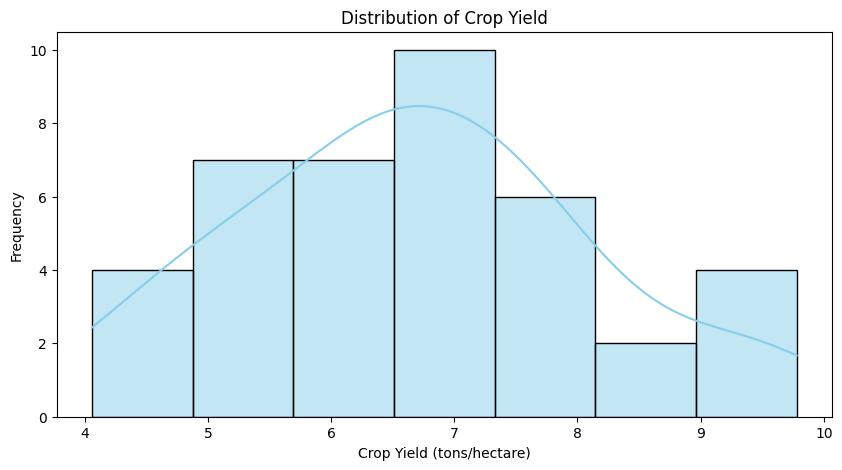

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Crop Yield'], kde=True, color="skyblue")
plt.title("Distribution of Crop Yield")
plt.xlabel("Crop Yield (tons/hectare)")
plt.ylabel("Frequency")
plt.show()

#### 2. Box Plot: Soil Quality by Crop Type

- Show the spread of soil quality scores for each crop type.
- Use hue for deeper insights and spotting outliers.

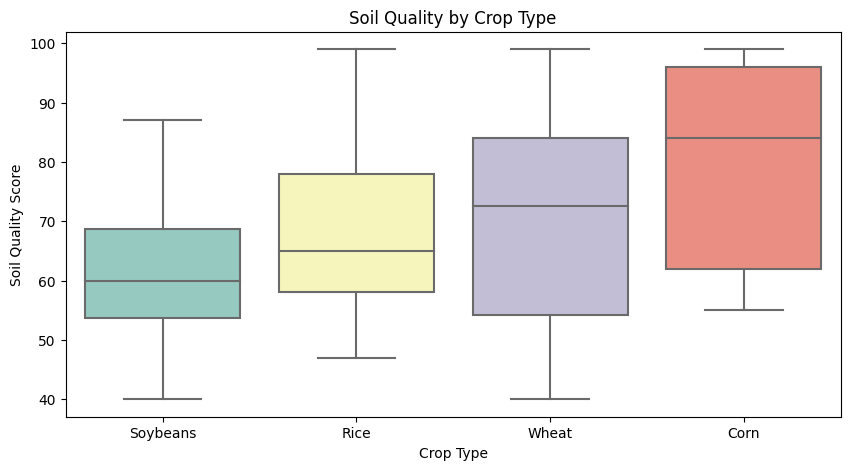

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Crop Type', y='Soil Quality', data=df, palette="Set3")
plt.title("Soil Quality by Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Soil Quality Score")
plt.show()

#### 3. Violin Plot: Pesticide Usage by Crop Type

- Combine box plot with density estimation.
- Useful for understanding data spread and concentration within each crop type.

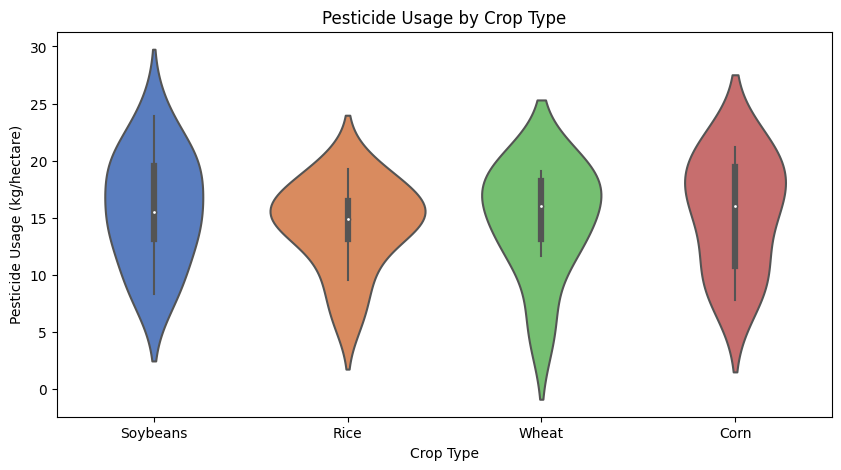

In [7]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Crop Type', y='Pesticide Usage', data=df, palette="muted")
plt.title("Pesticide Usage by Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Pesticide Usage (kg/hectare)")
plt.show()

#### 4. Scatter Plot: Rainfall vs Crop Yield

- Visualize the relationship between rainfall and crop yield.
- Use hue to categorize by crop type and style to differentiate points.

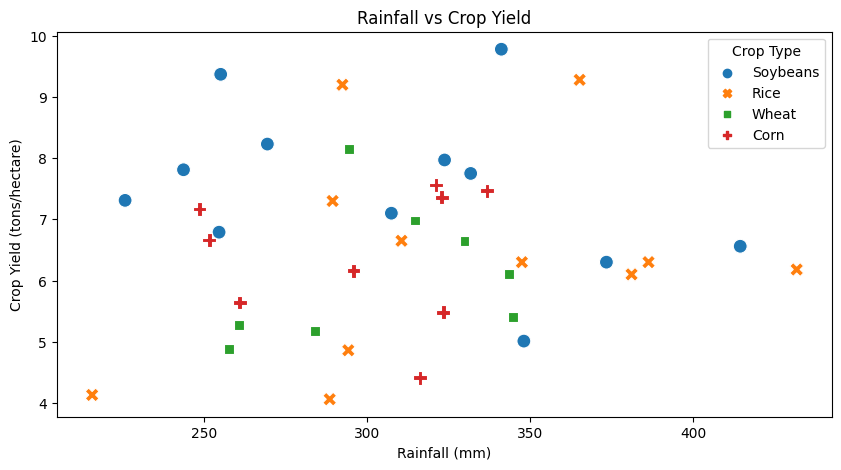

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Rainfall', y='Crop Yield', hue='Crop Type', style='Crop Type', data=df, s=100)
plt.title("Rainfall vs Crop Yield")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Crop Yield (tons/hectare)")
plt.show()

#### 5. Pair Plot: Relationships among Continuous Variables

- Display pairwise relationships for all continuous variables.
- Color-code based on crop type for easy comparison.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


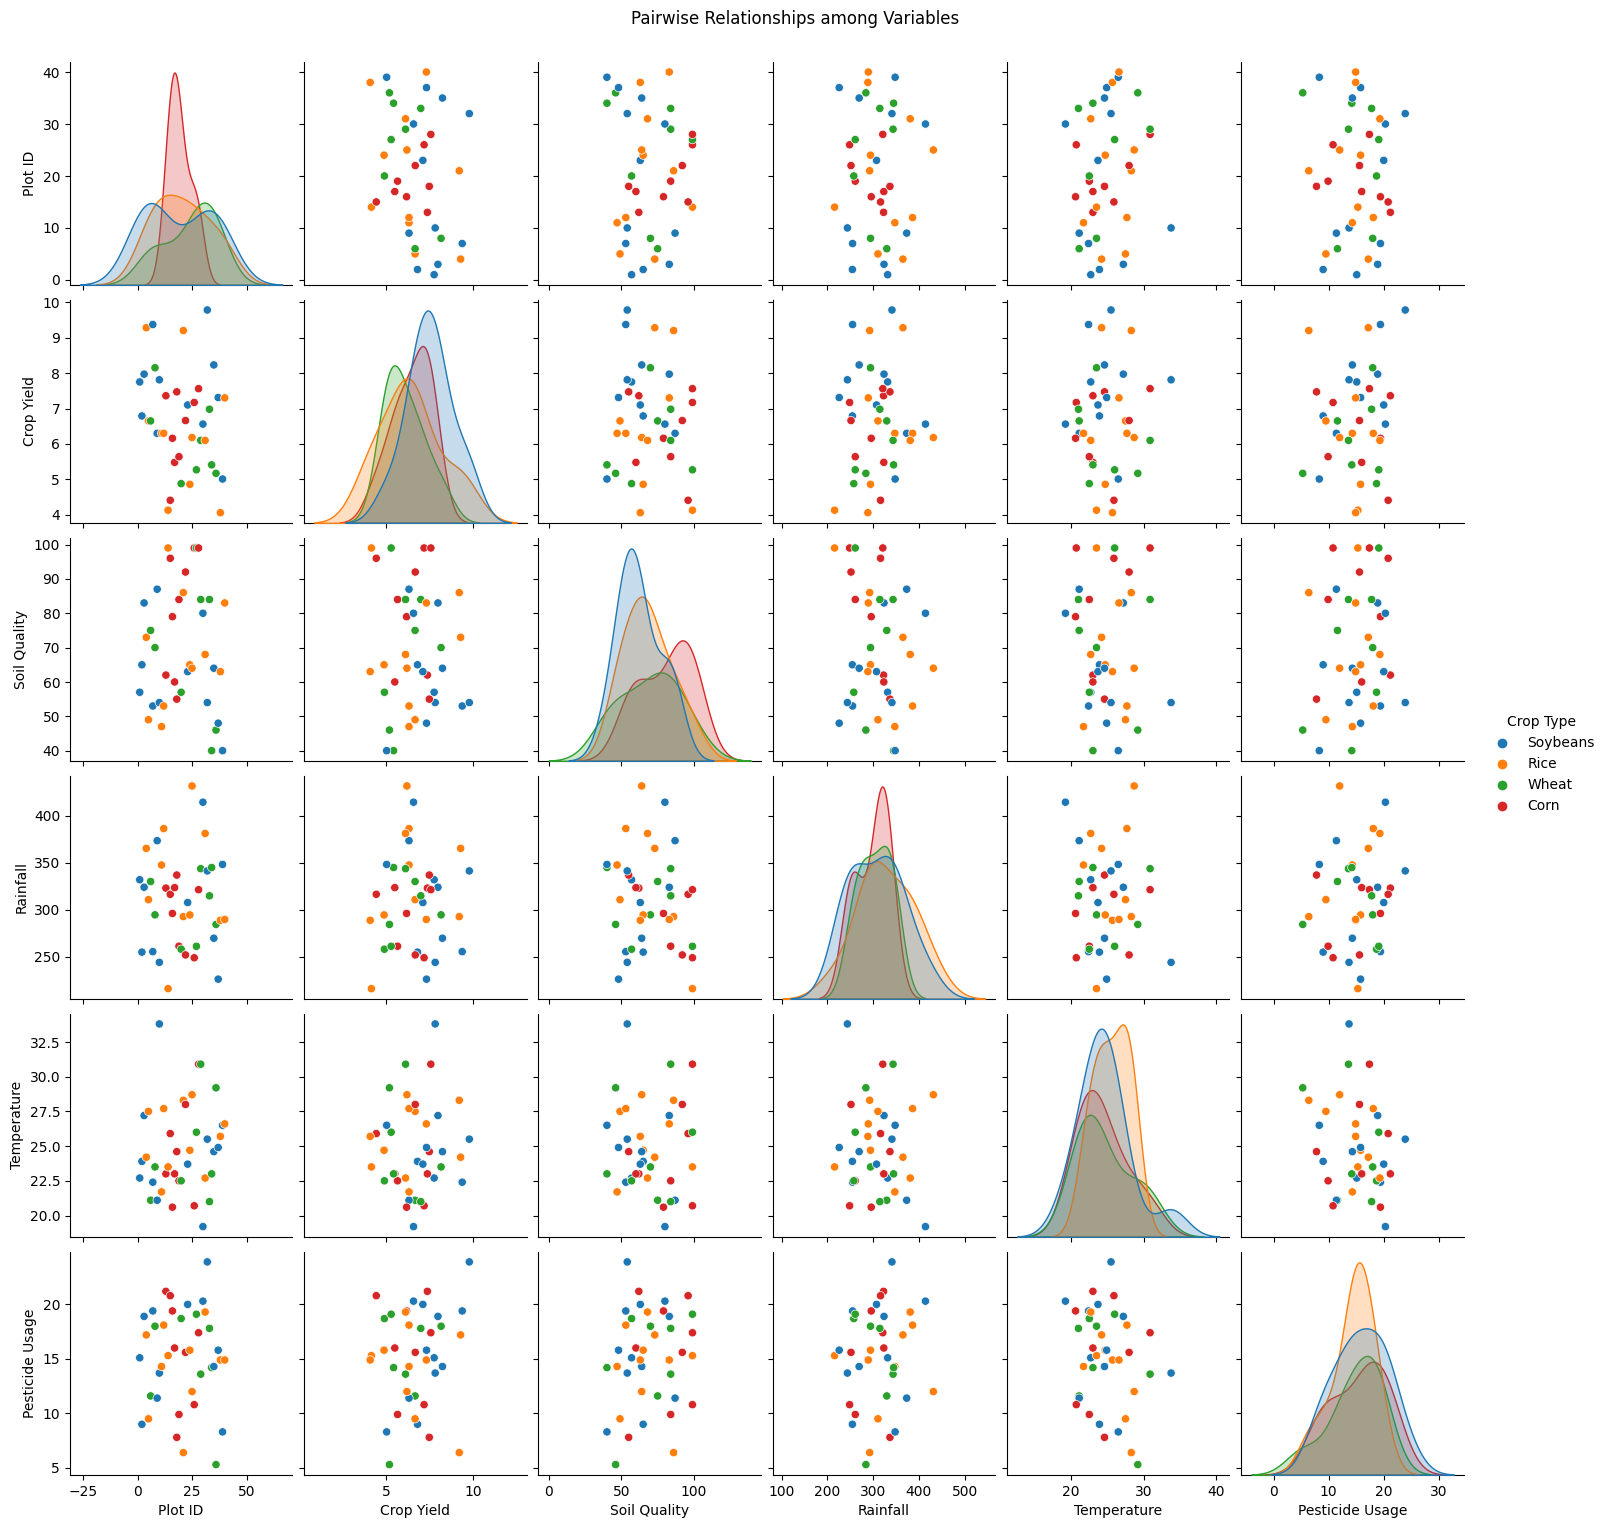

In [9]:
sns.pairplot(df, hue="Crop Type", palette="tab10", diag_kind="kde")
plt.suptitle("Pairwise Relationships among Variables", y=1.02)
plt.show()

#### 6. Bar Plot: Average Crop Yield by Crop Type

- Compare average yield for each crop type.
- Use error bars to display variability within each category.

C:\Users\PC\AppData\Local\Temp\ipykernel_28932\1521215955.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Crop Type', y='Crop Yield', data=df, palette="pastel", ci="sd")


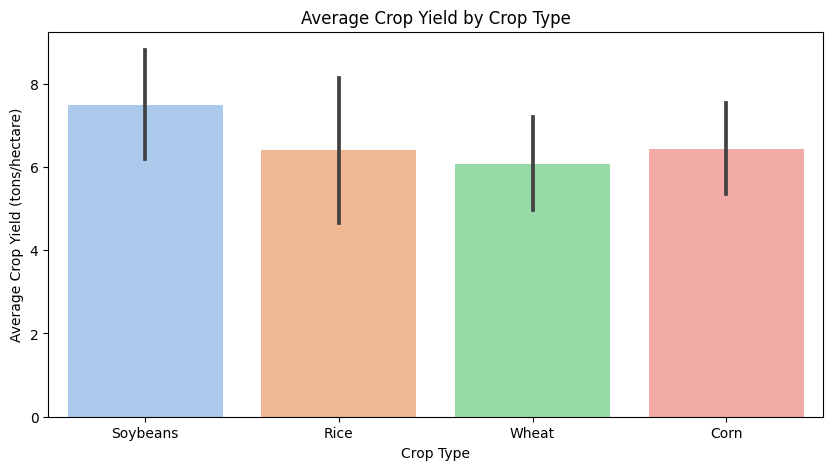

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Crop Type', y='Crop Yield', data=df, palette="pastel", ci="sd")
plt.title("Average Crop Yield by Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average Crop Yield (tons/hectare)")
plt.show()

#### 7. Heatmap: Correlation Matrix of Continuous Variables

- Display correlations to understand relationships between variables like soil quality, rainfall, temperature, etc.
- Use annot=True to show correlation values on the heatmap.

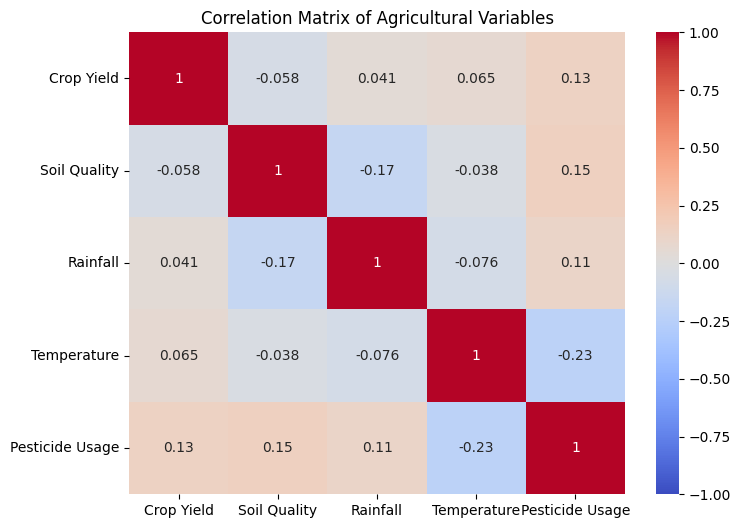

In [11]:
plt.figure(figsize=(8, 6))
corr = df[['Crop Yield', 'Soil Quality', 'Rainfall', 'Temperature', 'Pesticide Usage']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Agricultural Variables")
plt.show()

#### 8. Strip Plot: Crop Yield by Crop Type

- Use stripplot to visualize individual data points by crop type.
- Add jitter for better separation of overlapping data points.

C:\Users\PC\AppData\Local\Temp\ipykernel_28932\171310138.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Crop Type', y='Crop Yield', data=df, jitter=True, palette="Set2")


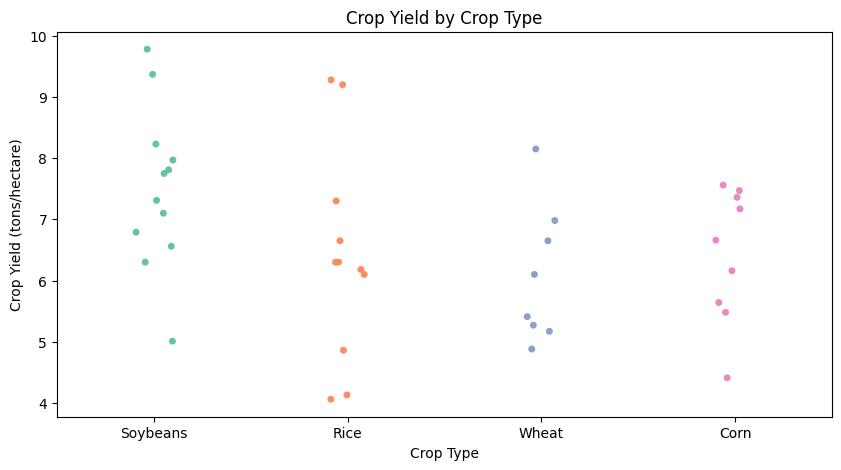

In [12]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='Crop Type', y='Crop Yield', data=df, jitter=True, palette="Set2")
plt.title("Crop Yield by Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Crop Yield (tons/hectare)")
plt.show()

#### 9. Swarm Plot: Soil Quality by Crop Type

- A more organized version of stripplot with better distribution.
- Helps visualize dense data points by grouping around central axis.

C:\Users\PC\AppData\Local\Temp\ipykernel_28932\1574969640.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Crop Type', y='Soil Quality', data=df, palette="viridis")


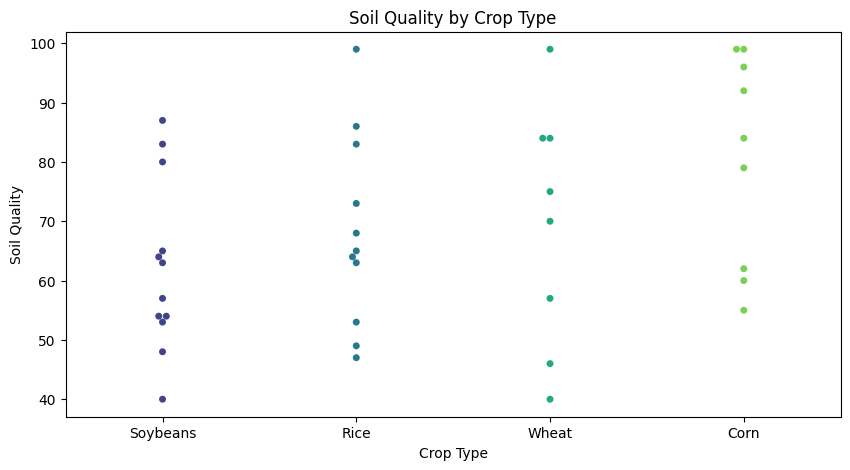

In [13]:
plt.figure(figsize=(10, 5))
sns.swarmplot(x='Crop Type', y='Soil Quality', data=df, palette="viridis")
plt.title("Soil Quality by Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Soil Quality")
plt.show()

#### 10. Facet Grid: Crop Yield Across Multiple Variables

- Use FacetGrid to display multiple plots based on categorical variables.
- Here, visualize crop yield by crop type across soil quality levels.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


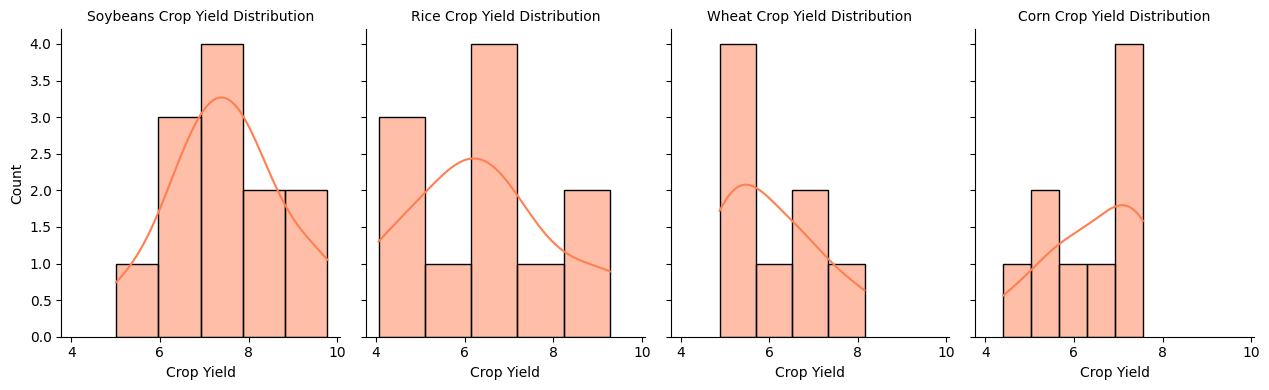

In [14]:
g = sns.FacetGrid(df, col="Crop Type", height=4, aspect=0.8)
g.map(sns.histplot, "Crop Yield", kde=True, color="coral")
g.set_titles("{col_name} Crop Yield Distribution")
plt.show()

#### 11. Line Plot: Temperature Over Time for Each Plot

- Simulate daily temperature readings for each plot and plot over time.
- This example could be extended with real-time data.

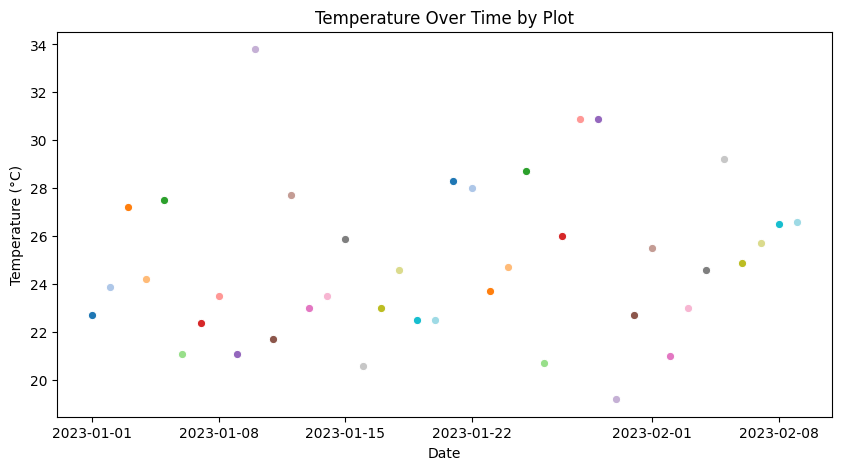

In [16]:
# Adding a simulated date and temperature over a 20-day period
df['Date'] = pd.date_range(start='2023-01-01', periods=40)

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Temperature', hue='Plot ID', data=df, palette="tab20", marker='o')
plt.title("Temperature Over Time by Plot")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend([],[], frameon=False)  # Optional: Hide legend to declutter
plt.show()


### 12. Reg Plot: Regression Line for Rainfall and Crop Yield

- Add a regression line to explore trends and relationships.
- Show confidence intervals to understand the spread.

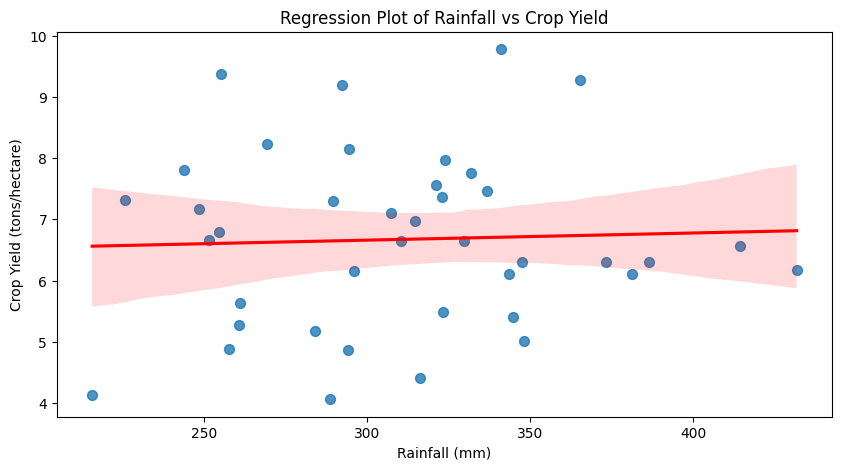

In [17]:
plt.figure(figsize=(10, 5))
sns.regplot(x="Rainfall", y="Crop Yield", data=df, scatter_kws={'s':50}, line_kws={"color":"red"})
plt.title("Regression Plot of Rainfall vs Crop Yield")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Crop Yield (tons/hectare)")
plt.show()